In [1]:
'''
This file analyzes results of the computer predictions,
comparing different strategies used.
'''

import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from scipy.stats import norm

In [2]:
#Functions

def wilcoxon_test(group1, group2):
    
    # Perform the Wilcoxon signed-rank test
    stat, p_value = wilcoxon(group1, group2)
    
    # Calculate the effect size (r)
    n = len(group1)
    z = norm.ppf(1 - p_value / 2)  # Compute z-score from p-value (two-tailed test)
    effect_size = z / np.sqrt(n)
    
    # Output the test statistic and p-value
    print(f"Wilcoxon test statistic: {stat}")
    print(f"P-value: {p_value}")
    print(f"effect size: {effect_size}")
    print("diff", np.mean(group1) - np.mean(group2), "group 1: ", np.mean(group1), "group 2: ", np.mean(group2))
    mean_diff = np.mean(group1) - np.mean(group2)
    return stat, p_value, effect_size, mean_diff

In [3]:
#just using the metrics sheet to load the metrics sheets

regions = ['Gulf', 'PA', 'NL 2020', 'NL 2021']
all_f1 = {'Gulf':{}, 'PA':{}, 'NL 2020':{}, 'NL 2021':{}}
path = 'CyrilUnzipped/AMP FlowCam strategy predictions results and reports'
for region in regions:
    # if region == 'Gulf':
    #     continue
    for name in glob.glob(path + '/' + region + '/metrics/*'):
        dict_name = name.split('/')[-1]
        dict_name = dict_name.split('.')[0].split(region + '-')[1]
        print(name)
        print(dict_name)
        xls = pd.ExcelFile(name)
        df_dict = pd.read_excel(xls, None)
        dfs = list(df_dict.values())
        df_names = list(df_dict.keys())
        # for key, df in dfs.items():
        #     print(key)
        #     print(df)
        #     break
        all_f1[region][dict_name] = []
        for i, df in enumerate(dfs):
            if i < 8:
                f1_score = df.loc[len(df)-1]['f1-score']
                all_f1[region][dict_name].append(f1_score)




CyrilUnzipped/AMP FlowCam strategy predictions results and reports/Gulf/metrics\Gulf-With SCN-200 Objects-metrics data.xlsx
With SCN-200 Objects-metrics data
CyrilUnzipped/AMP FlowCam strategy predictions results and reports/Gulf/metrics\Gulf-With SCN-20000 Objects-metrics data.xlsx
With SCN-20000 Objects-metrics data
CyrilUnzipped/AMP FlowCam strategy predictions results and reports/Gulf/metrics\Gulf-With SCN-5000 Objects-metrics data.xlsx
With SCN-5000 Objects-metrics data
CyrilUnzipped/AMP FlowCam strategy predictions results and reports/Gulf/metrics\Gulf-With SCN-Max Objects-metrics data.xlsx
With SCN-Max Objects-metrics data
CyrilUnzipped/AMP FlowCam strategy predictions results and reports/Gulf/metrics\Gulf-Without SCN-200 Objects-metrics data.xlsx
Without SCN-200 Objects-metrics data
CyrilUnzipped/AMP FlowCam strategy predictions results and reports/Gulf/metrics\Gulf-Without SCN-20000 Objects-metrics data.xlsx
Without SCN-20000 Objects-metrics data
CyrilUnzipped/AMP FlowCam stra

In [4]:
regions_list = [] #Gulf, PA, NL 2020, NL 2021
training_regions = [] # Regional, All
min_class_sizes = [] # all, restricted
extra_classes_included = [] #yes, no
scn = [] #yes, no
f1s = []
max_class_sizes = [] #200, 5000, 20000, Max
for region in all_f1.keys():
    for sample in all_f1[region].keys():
        if sample == 'samples used':
            continue
        for i, score in enumerate(all_f1[region][sample]):
            if i > 7:
                continue
            regions_list.append(region)
            if 'With SCN' in sample:
                scn.append(1)
            else:
                scn.append(0)
            print(sample)
            max_size = sample.split(' ')[1].split('-')[1]
            print(max_size)
            max_class_sizes.append(max_size)
            f1s.append(score)

            if i < 4:
                training_regions.append('regional')
            else:
                training_regions.append('all')
            if i in [0, 1, 4, 5]:
                min_class_sizes.append('all')
            else:
                min_class_sizes.append('restricted')
            if i % 2 == 0:
                extra_classes_included.append(0)
            else:
                extra_classes_included.append(1)
                
            

With SCN-200 Objects-metrics data
200
With SCN-200 Objects-metrics data
200
With SCN-200 Objects-metrics data
200
With SCN-200 Objects-metrics data
200
With SCN-200 Objects-metrics data
200
With SCN-200 Objects-metrics data
200
With SCN-200 Objects-metrics data
200
With SCN-200 Objects-metrics data
200
With SCN-20000 Objects-metrics data
20000
With SCN-20000 Objects-metrics data
20000
With SCN-20000 Objects-metrics data
20000
With SCN-20000 Objects-metrics data
20000
With SCN-20000 Objects-metrics data
20000
With SCN-20000 Objects-metrics data
20000
With SCN-20000 Objects-metrics data
20000
With SCN-20000 Objects-metrics data
20000
With SCN-5000 Objects-metrics data
5000
With SCN-5000 Objects-metrics data
5000
With SCN-5000 Objects-metrics data
5000
With SCN-5000 Objects-metrics data
5000
With SCN-5000 Objects-metrics data
5000
With SCN-5000 Objects-metrics data
5000
With SCN-5000 Objects-metrics data
5000
With SCN-5000 Objects-metrics data
5000
With SCN-Max Objects-metrics data
Max
Wi

In [5]:
print(len(regions_list), len(training_regions), len(extra_classes_included), len(scn), len(f1s), len(max_class_sizes))
big_df = pd.DataFrame.from_dict({'regions': regions_list, 
                                 'training regions': training_regions,
                                 'extra classes included': extra_classes_included, 
                                 'scn': scn,
                                 'f1': f1s, 
                                 'max class sizes': max_class_sizes,
                                 'min_class_sizes': min_class_sizes,
                                })
big_df

256 256 256 256 256 256


,regions,training regions,extra classes included,scn,f1,max class sizes,min_class_sizes
0,Gulf,regional,0,1,0.486576,200,all
1,Gulf,regional,1,1,0.488525,200,all
2,Gulf,regional,0,1,0.487379,200,restricted
3,Gulf,regional,1,1,0.485634,200,restricted
4,Gulf,all,0,1,0.489669,200,all
...,...,...,...,...,...,...,...
251,NL 2021,regional,1,0,0.700265,Max,restricted
252,NL 2021,all,0,0,0.699647,Max,all
253,NL 2021,all,1,0,0.697603,Max,all
254,NL 2021,all,0,0,0.701006,Max,restricted


In [6]:
# -NL 2020 max training class = 5448 acartia
# -NL 2021 max training class = 5448 acartia
# -Gulf max training class = 101 461 acartia, 10 297 Copepoda, 7238 Evadne spp.,
# -PA max training class = 6358 Cirripedia

biggest_classes = {'Gulf': 101461, 'PA': 6358, 'NL 2020': 5448, 'NL 2021': 5448}
f1_nulled = []
for i, row in big_df.iterrows():
    max_class_size = (row['max class sizes'])
    if max_class_size == 'Max':
        max_class_size = 20001
    if int(max_class_size) >= biggest_classes[row['regions']] and row['training regions'] == 'regional':
        f1_nulled.append(np.nan)
    else:
        f1_nulled.append(row['f1'])
big_df['f1 nulled'] = f1_nulled
pa = big_df[(big_df['regions'] == 'PA')].reset_index()
pa = pa[pa['scn'] == 0].reset_index()
pa

,level_0,index,regions,training regions,extra classes included,scn,f1,max class sizes,min_class_sizes,f1 nulled
0,32,96,PA,regional,0,0,0.584924,200,all,0.584924
1,33,97,PA,regional,1,0,0.585555,200,all,0.585555
2,34,98,PA,regional,0,0,0.593130,200,restricted,0.593130
3,35,99,PA,regional,1,0,0.589075,200,restricted,0.589075
4,36,100,PA,all,0,0,0.494736,200,all,0.494736
5,37,101,PA,all,1,0,0.494630,200,all,0.494630
6,38,102,PA,all,0,0,0.497022,200,restricted,0.497022
7,39,103,PA,all,1,0,0.498836,200,restricted,0.498836
8,40,104,PA,regional,0,0,0.734777,20000,all,NaN
9,41,105,PA,regional,1,0,0.736822,20000,all,NaN


104
104
104
104
104
104
80
80
64
64
{'min_class_size': 0.002732039590262101, 'scn': 0.00460675430885047, 'extra_classes': 0.008074366639098943, 'training regions': 0.035096698159051344, 'max class': 0.13224678133895038}
***************************
[0.002732039590262101, 0.00460675430885047, 0.008074366639098943, 0.035096698159051344, 0.13224678133895038]


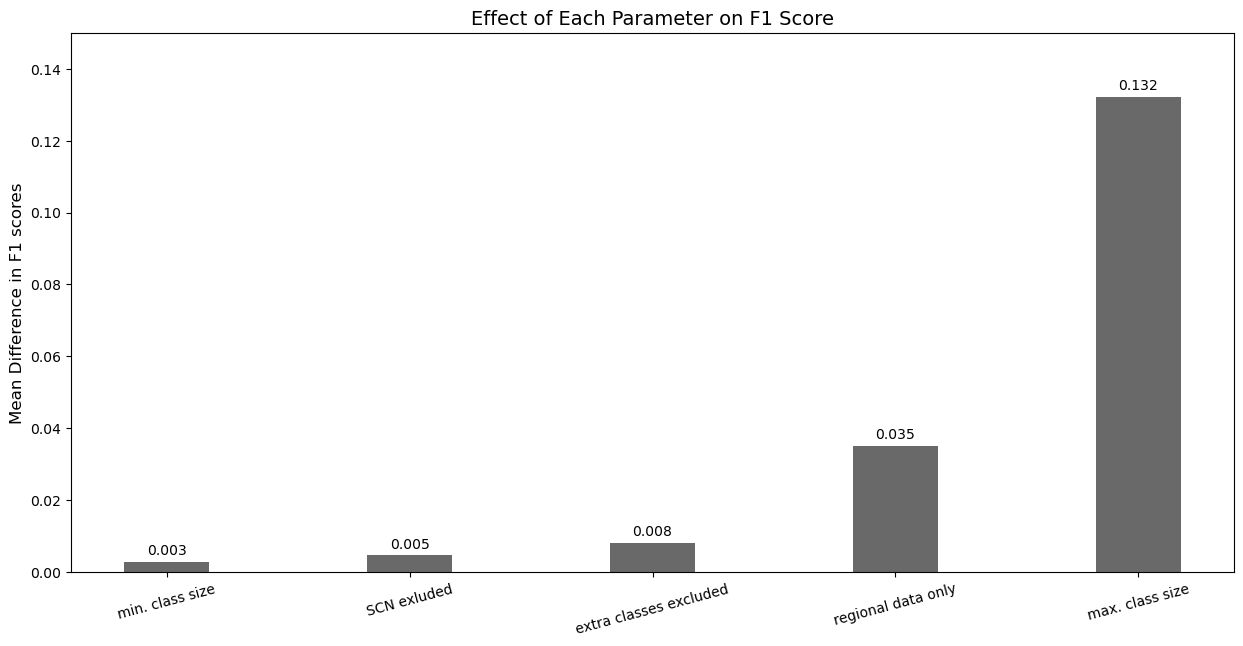

In [7]:
parameter_dict = {}
parameter_dict['min_class_size'] = {}
parameter_dict['scn'] = {}
parameter_dict['extra_classes'] = {}
parameter_dict['training regions'] = {}
parameter_dict['max class'] = {}


parameter_dict['min_class_size']['restricted'] = big_df[big_df['min_class_sizes'] == 'restricted']['f1 nulled'].to_numpy()
parameter_dict['min_class_size']['unrestricted'] = big_df[big_df['min_class_sizes'] == 'all']['f1 nulled'].to_numpy()

parameter_dict['scn']['not included'] = big_df[big_df['scn'] == 0]['f1 nulled'].to_numpy()
parameter_dict['scn']['included'] = big_df[big_df['scn'] == 1]['f1 nulled'].to_numpy()

parameter_dict['extra_classes']['not included'] = big_df[big_df['extra classes included'] == 0]['f1 nulled'].to_numpy()
parameter_dict['extra_classes']['included'] = big_df[big_df['extra classes included'] == 1]['f1 nulled'].to_numpy()

parameter_dict['training regions']['regional'] = big_df[big_df['training regions'] == 'regional']['f1 nulled'].to_numpy()
parameter_dict['training regions']['all'] = big_df[big_df['training regions'] == 'all']['f1 nulled'].to_numpy()

parameter_dict['max class']['5000'] = big_df[big_df['max class sizes'] == '5000']['f1 nulled'].to_numpy()
parameter_dict['max class']['200'] = big_df[big_df['max class sizes'] == '200']['f1 nulled'].to_numpy()

new_regional = []
new_all = []
for i, val in enumerate(parameter_dict['training regions']['regional']):
    if not np.isnan(val):
        new_regional.append(parameter_dict['training regions']['regional'][i])
        new_all.append(parameter_dict['training regions']['all'][i])
parameter_dict['training regions']['regional'] = np.array(new_regional)
parameter_dict['training regions']['all'] = np.array(new_all)

filtered_dict = {}
for key in parameter_dict.keys():
    filtered_dict[key] = {}
    for second_key in parameter_dict[key].keys():
        filtered_dict[key][second_key] = parameter_dict[key][second_key][~np.isnan(parameter_dict[key][second_key])]
        print(len(filtered_dict[key][second_key]))

mean_diffs = {}
diffs = {}
mean_diffs_arr = []
for key in filtered_dict.keys():
    two_arrays = []
    for val in filtered_dict[key].values():
        two_arrays.append(val)
    diffs[key] = two_arrays[0] - two_arrays[1]
    mean_diffs[key] = np.mean(two_arrays[0] - two_arrays[1])
    mean_diffs_arr.append(mean_diffs[key])
# print(diffs)
print(mean_diffs)
print('***************************')
print(mean_diffs_arr)



labels = ['min. class size', 'SCN exluded', 'extra classes excluded', 'regional data only', 'max. class size']
group1_values = mean_diffs_arr


x = np.arange(len(labels))  # X locations for the groups
width = 0.35  # Width of the bars

# Plotting the bars
fig, ax = plt.subplots(figsize=(15, 7))
rects1 = ax.bar(x, group1_values, width, label='Group 1', color='dimgrey')


# Add some text for labels, title, and custom x-axis tick labels, etc.
# ax.set_xlabel('Parameters')
ax.set_ylabel('Mean Difference in F1 scores', fontsize=12)
ax.set_title('Effect of Each Parameter on F1 Score', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=15)
ax.set_ylim([0, .15])
# ax.legend()

# Adding values on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{round(height, 3)}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)

plt.show()

# //////////////////////////////////////////////

In [8]:
from scipy import stats
from scipy.stats import kruskal

diffs_arr = []
for val in diffs.values():
    diffs_arr.append(val)


# Perform the Kruskal-Wallis H Test
stat, p_value = kruskal(diffs_arr[0], diffs_arr[1], diffs_arr[2], diffs_arr[3], diffs_arr[4])

print(f"Kruskal-Wallis H statistic: {stat}")
print(f"P-value: {p_value}")

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(diffs_arr[0], diffs_arr[1], diffs_arr[2], diffs_arr[3], diffs_arr[4])

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

from scipy.stats import mannwhitneyu
# Perform the Mann-Whitney U Test
stat, p_value = mannwhitneyu(diffs_arr[3], diffs_arr[4], alternative='two-sided')

print(f"Mann-Whitney U statistic: {stat}")
print(f"P-value: {p_value}")

Kruskal-Wallis H statistic: 248.99048047300653
P-value: 1.0740670568007471e-52
F-statistic: 625.679970023163
P-value: 1.7060360869841666e-182
Mann-Whitney U statistic: 107.0
P-value: 6.199690468471383e-23


//////////////
Gulf
Wilcoxon test statistic: 7.0
P-value: 8.847564458847046e-09
effect size: 1.016724217413838
diff -0.00908660255055116 group 1:  0.6536096342751472 group 2:  0.6626962368256983
//////////////
PA
Wilcoxon test statistic: 0.0
P-value: 1.1920928955078125e-07
effect size: 1.080776945576961
diff -0.013539075792457722 group 1:  0.6278159039668042 group 2:  0.6413549797592619
//////////////
NL 2020
Wilcoxon test statistic: 23.0
P-value: 7.62939453125e-05
effect size: 0.8074647076161786
diff 0.012380064830707305 group 1:  0.5998042893307068 group 2:  0.5874242244999995
//////////////
NL 2021
Wilcoxon test statistic: 22.0
P-value: 6.389617919921875e-05
effect size: 0.8160760568588417
diff -0.006688120975866907 group 1:  0.647774555605256 group 2:  0.6544626765811229


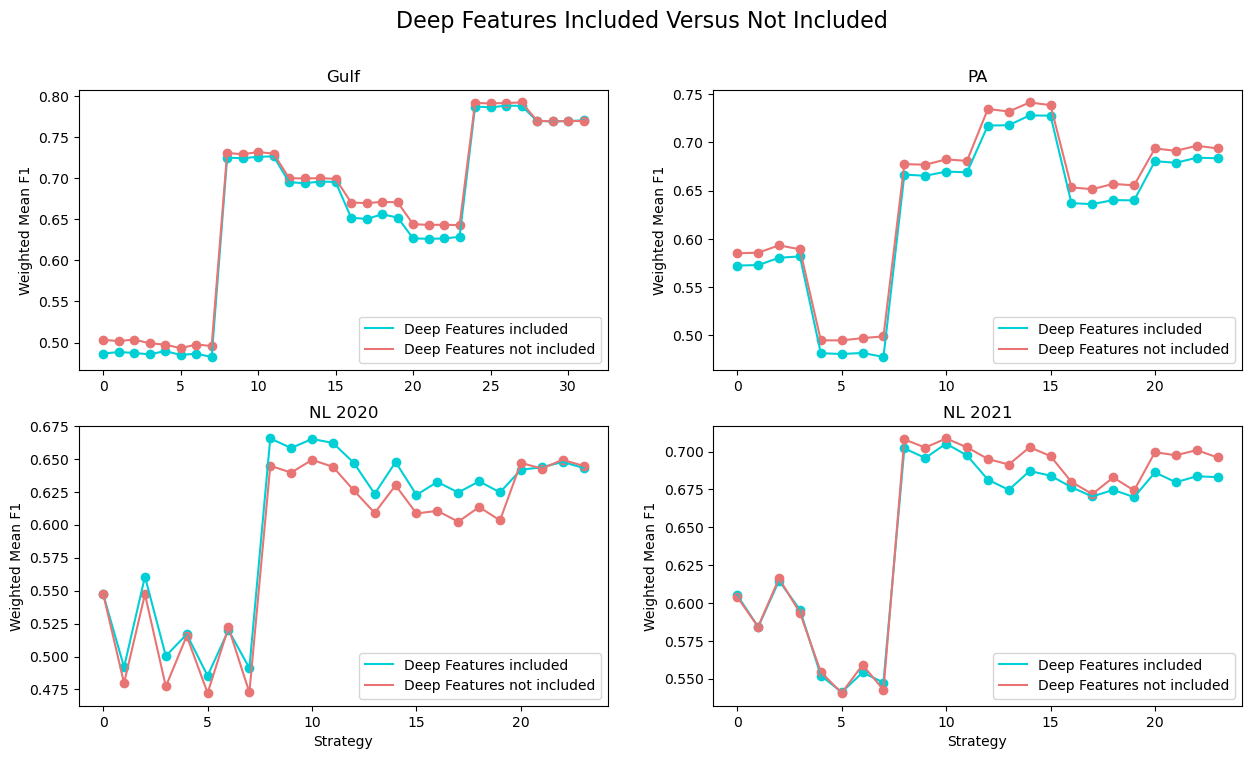

104 104
std group1:  0.08467291537758932 std group2:  0.08595791977167368
Wilcoxon test statistic: 1544.0
P-value: 0.00012007664856915283
effect size: 0.37712834738842677
diff -0.0046067543088506024 group 1:  0.6338940602929914 group 2:  0.638500814601842


(1544.0, 0.00012007664856915283, 0.37712834738842677, -0.0046067543088506024)

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
all_extra_included = []
all_extra_not_included = []
quadrants = [[0, 0], [0, 1], [1, 0], [1, 1]]
for i, region in enumerate(regions):
    extra_included = big_df[(big_df['regions'] == region) & (big_df['scn'] == 1)]['f1 nulled'].to_numpy()
    extra_not_included = big_df[(big_df['regions'] == region) & (big_df['scn'] == 0)]['f1 nulled'].to_numpy()
    extra_included = extra_included[~np.isnan(extra_included)]
    extra_not_included = extra_not_included[~np.isnan(extra_not_included)]
    # print(extra_included)
    # print(extra_not_included)
    print('//////////////')
    print(region)
    wilcoxon_test(extra_included, extra_not_included)
    all_extra_included.append(extra_included)
    all_extra_not_included.append(extra_not_included)
    axs[quadrants[i][0], quadrants[i][1]].set_title(region)
    # all = [all[i] for i in reorder_list]
    axs[quadrants[i][0], quadrants[i][1]].scatter(range(len(extra_included)), extra_included, color='#00d0d6')
    axs[quadrants[i][0], quadrants[i][1]].scatter(range(len(extra_not_included)), extra_not_included, color='#e87474')
    axs[quadrants[i][0], quadrants[i][1]].plot(extra_included, color='#00d0d6', label=f'Deep Features included')
    axs[quadrants[i][0], quadrants[i][1]].plot(extra_not_included, color='#e87474', label=f'Deep Features not included')
    if i > 1:
        axs[quadrants[i][0], quadrants[i][1]].set_xlabel('Strategy')
    axs[quadrants[i][0], quadrants[i][1]].set_ylabel('Weighted Mean F1')
# plt.xticks(range(4), [200, 5000, 20000, 'Max'])
    if i == 0:
        axs[quadrants[i][0], quadrants[i][1]].legend(loc='lower right')
    else:
        axs[quadrants[i][0], quadrants[i][1]].legend(loc='lower right')
        # Set overall figure title
fig.suptitle("Deep Features Included Versus Not Included", fontsize=16)
plt.show()
plt.close()

flat_list1 = [item for row in all_extra_included for item in row]
flat_list2 = [item for row in all_extra_not_included for item in row]
print(len(flat_list1), len(flat_list2))
print("std group1: ", np.std(flat_list1), "std group2: ", np.std(flat_list2))
wilcoxon_test(flat_list1, flat_list2)

//////////////
Gulf
Wilcoxon test statistic: 80.0
P-value: 0.00030640000477433205
effect size: 0.6381334800711652
diff -0.001123679162584268 group 1:  0.6575910959691306 group 2:  0.6587147751317148
//////////////
PA
Wilcoxon test statistic: 44.0
P-value: 0.0015796422958374023
effect size: 0.644958798601071
diff -0.001119847642887306 group 1:  0.6340255180415894 group 2:  0.6351453656844767
//////////////
NL 2020
Wilcoxon test statistic: 1.0
P-value: 2.384185791015625e-07
effect size: 1.0546233424636318
diff -0.023339977906094322 group 1:  0.581944267962306 group 2:  0.6052842458684004
//////////////
NL 2021
Wilcoxon test statistic: 0.0
P-value: 1.1920928955078125e-07
effect size: 1.080776945576961
diff -0.009030857670335068 group 1:  0.6466031872580219 group 2:  0.655634044928357


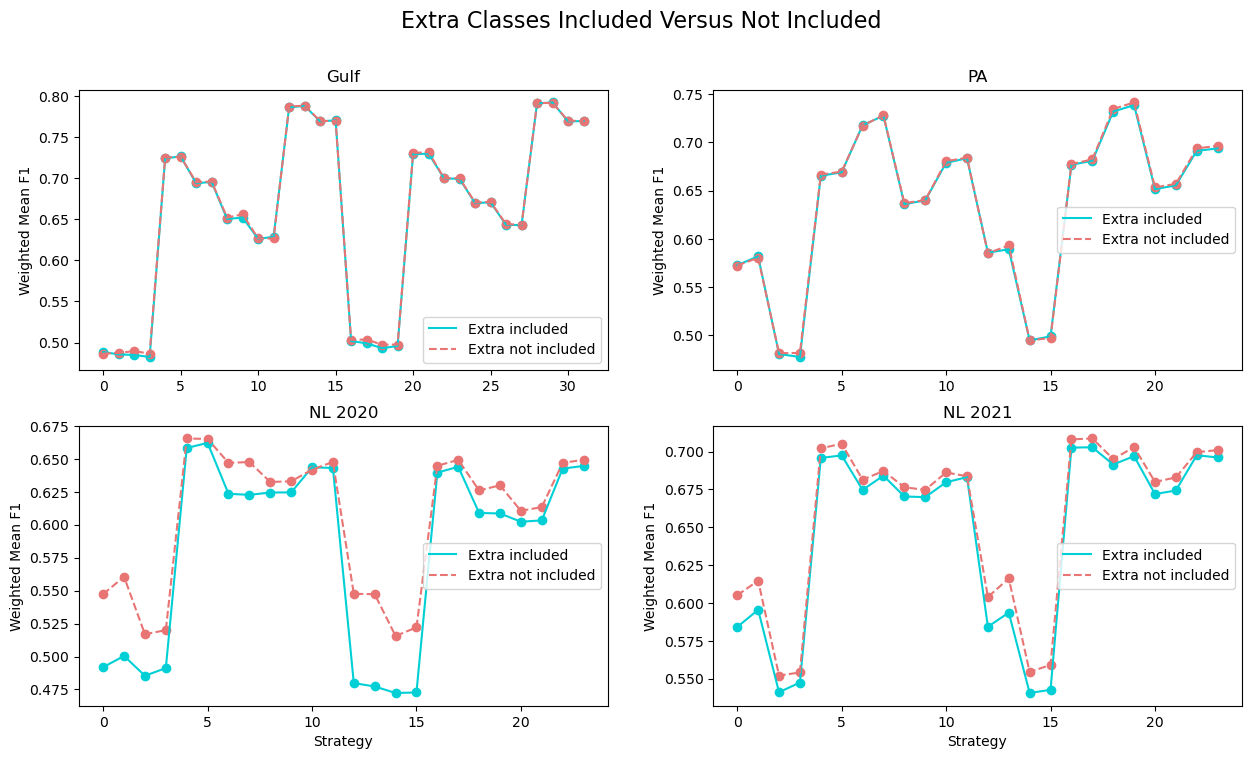

104 104
std group1:  0.08834452299178491 std group2:  0.08204587266698818
Wilcoxon test statistic: 295.0
P-value: 2.8745199506636423e-15
effect size: 0.7742384542981422
diff -0.008074366639098884 group 1:  0.6321602541278672 group 2:  0.6402346207669661


(295.0, 2.8745199506636423e-15, 0.7742384542981422, -0.008074366639098884)

In [10]:
no_scn_colors = {'Gulf': 'palevioletred', 'PA': 'darkturquoise', 'NL 2020': 'gray', 'NL 2021': 'darkorange'}
scn_colors = {'Gulf': 'lime', 'PA': 'lightblue', 'NL 2020': 'pink', 'NL 2021': 'gold'}
reorder_list = [0, 2, 1, 3]



fig, axs = plt.subplots(2, 2, figsize=(15, 8))
all_extra_included = []
all_extra_not_included = []
quadrants = [[0, 0], [0, 1], [1, 0], [1, 1]]
for i, region in enumerate(regions):
    extra_included = big_df[(big_df['regions'] == region) & (big_df['extra classes included'] == 1)]['f1 nulled'].to_numpy()
    extra_not_included = big_df[(big_df['regions'] == region) & (big_df['extra classes included'] == 0)]['f1 nulled'].to_numpy()
    extra_included = extra_included[~np.isnan(extra_included)]
    extra_not_included = extra_not_included[~np.isnan(extra_not_included)]
    print('//////////////')
    print(region)
    wilcoxon_test(extra_included, extra_not_included)
    all_extra_included.append(extra_included)
    all_extra_not_included.append(extra_not_included)
    axs[quadrants[i][0], quadrants[i][1]].set_title(region)
    # all = [all[i] for i in reorder_list]
    axs[quadrants[i][0], quadrants[i][1]].scatter(range(len(extra_included)), extra_included, color='#00d0d6')
    axs[quadrants[i][0], quadrants[i][1]].scatter(range(len(extra_not_included)), extra_not_included, color='#e87474')
    axs[quadrants[i][0], quadrants[i][1]].plot(extra_included, color='#00d0d6', label=f'Extra included')
    axs[quadrants[i][0], quadrants[i][1]].plot(extra_not_included, color='#e87474', linestyle='dashed', label=f'Extra not included')
    if i > 1:
        axs[quadrants[i][0], quadrants[i][1]].set_xlabel('Strategy')
    axs[quadrants[i][0], quadrants[i][1]].set_ylabel('Weighted Mean F1')
# plt.xticks(range(4), [200, 5000, 20000, 'Max'])
    if i == 0:
        axs[quadrants[i][0], quadrants[i][1]].legend(loc='lower right')
    else:
        axs[quadrants[i][0], quadrants[i][1]].legend(loc='center right')
        # Set overall figure title
fig.suptitle("Extra Classes Included Versus Not Included", fontsize=16)
plt.show()
plt.close()

flat_list1 = [item for row in all_extra_included for item in row]
flat_list2 = [item for row in all_extra_not_included for item in row]
print(len(flat_list1), len(flat_list2))
print("std group1: ", np.std(flat_list1), "std group2: ", np.std(flat_list2))
wilcoxon_test(flat_list1, flat_list2)

#turquoise: #00d0d6
#ruddy red: #e87474

//////////////
Gulf
Wilcoxon test statistic: 162.0
P-value: 0.05696781584993005
effect size: 0.3365046346591855
diff 0.0004344845809443054 group 1:  0.6583701778408948 group 2:  0.6579356932599505
//////////////
PA
Wilcoxon test statistic: 5.0
P-value: 1.1920928955078125e-06
effect size: 0.9914202212426525
diff 0.004585760554086105 group 1:  0.636878322140076 group 2:  0.6322925615859899
//////////////
NL 2020
Wilcoxon test statistic: 39.0
P-value: 0.0008462667465209961
effect size: 0.6812033337797804
diff 0.0026889681766809614 group 1:  0.5949587410036936 group 2:  0.5922697728270127
//////////////
NL 2021
Wilcoxon test statistic: 25.0
P-value: 0.00010764598846435547
effect size: 0.7905070941238296
diff 0.003984796719109784 group 1:  0.6531110144527443 group 2:  0.6491262177336345


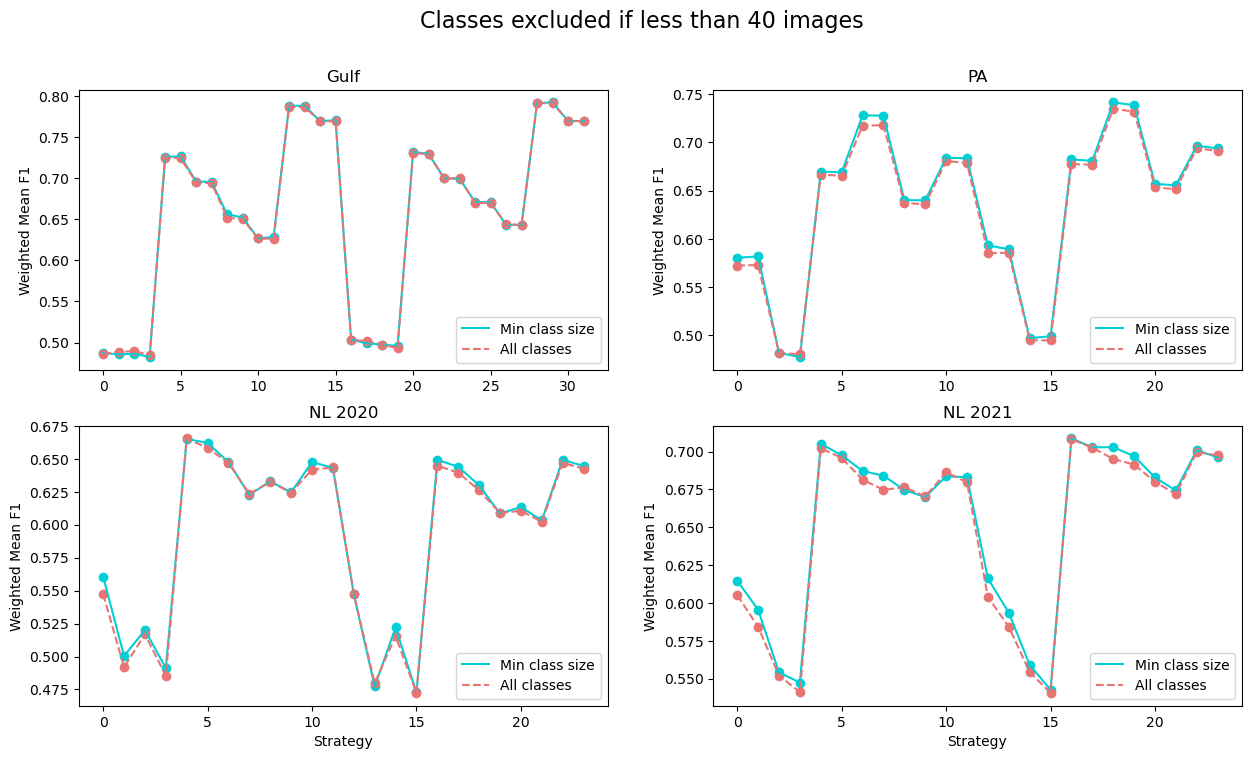

104 104
std group1:  0.08536188172634904 std group2:  0.08531409491180438
Wilcoxon test statistic: 652.0
P-value: 1.5997079637323582e-11
effect size: 0.6607696539108392
diff 0.0027320395902621364 group 1:  0.6375634572425478 group 2:  0.6348314176522857


(652.0, 1.5997079637323582e-11, 0.6607696539108392, 0.0027320395902621364)

In [11]:

fig, axs = plt.subplots(2, 2, figsize=(15, 8))
all_extra_included = []
all_extra_not_included = []
quadrants = [[0, 0], [0, 1], [1, 0], [1, 1]]
for i, region in enumerate(regions):
    extra_included = big_df[(big_df['regions'] == region) & (big_df['min_class_sizes'] == 'restricted')]['f1 nulled'].to_numpy()
    extra_not_included = big_df[(big_df['regions'] == region) & (big_df['min_class_sizes'] == 'all')]['f1 nulled'].to_numpy()
    extra_included = extra_included[~np.isnan(extra_included)]
    extra_not_included = extra_not_included[~np.isnan(extra_not_included)]
    print('//////////////')
    print(region)
    wilcoxon_test(extra_included, extra_not_included)
    all_extra_included.append(extra_included)
    all_extra_not_included.append(extra_not_included)
    axs[quadrants[i][0], quadrants[i][1]].set_title(region)
    # all = [all[i] for i in reorder_list]
    axs[quadrants[i][0], quadrants[i][1]].scatter(range(len(extra_included)), extra_included, color='#00d0d6')
    axs[quadrants[i][0], quadrants[i][1]].scatter(range(len(extra_not_included)), extra_not_included, color='#e87474')
    axs[quadrants[i][0], quadrants[i][1]].plot(extra_included, color='#00d0d6', label=f'Min class size')
    axs[quadrants[i][0], quadrants[i][1]].plot(extra_not_included, color='#e87474', linestyle='dashed', label=f'All classes')
    if i > 1:
        axs[quadrants[i][0], quadrants[i][1]].set_xlabel('Strategy')
    axs[quadrants[i][0], quadrants[i][1]].set_ylabel('Weighted Mean F1')
# plt.xticks(range(4), [200, 5000, 20000, 'Max'])
    if i == 0:
        axs[quadrants[i][0], quadrants[i][1]].legend(loc='lower right')
    else:
        axs[quadrants[i][0], quadrants[i][1]].legend(loc='lower right')
        # Set overall figure title
fig.suptitle("Classes excluded if less than 40 images", fontsize=16)
plt.show()
plt.close()

flat_list1 = [item for row in all_extra_included for item in row]
flat_list2 = [item for row in all_extra_not_included for item in row]
print(len(flat_list1), len(flat_list2))
print("std group1: ", np.std(flat_list1), "std group2: ", np.std(flat_list2))
wilcoxon_test(flat_list1, flat_list2)

#turquoise: #00d0d6
#ruddy red: #e87474

32
24
24
24


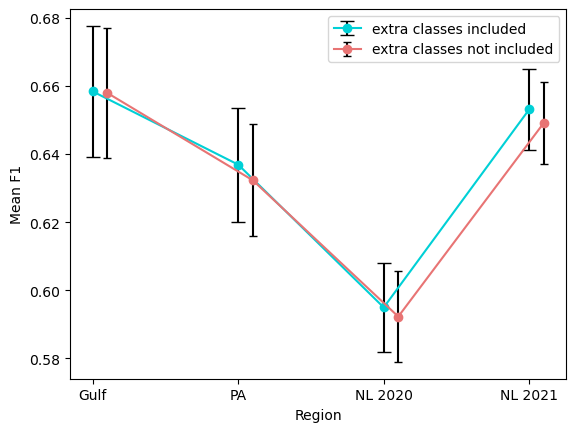

In [12]:
# remove nans

extra_included_means = []
extra_not_included_means = []

for i, values in enumerate(all_extra_included):
    all_extra_included[i] = all_extra_included[i][~np.isnan(all_extra_included[i])]
    all_extra_not_included[i] = all_extra_not_included[i][~np.isnan(all_extra_not_included[i])]
# Create the bar chart
fig, ax = plt.subplots()

extra_included_sems = []
extra_not_included_sems = []
for i, region_values in enumerate(regions):
    extra_included_means.append(np.mean(all_extra_included[i]))
    extra_not_included_means.append(np.mean(all_extra_not_included[i]))
    extra_included_sem = np.std(all_extra_included[i], ddof=1) / np.sqrt(len(all_extra_included[i]))
    extra_not_included_sem = np.std(all_extra_not_included[i], ddof=1) / np.sqrt(len(all_extra_not_included[i]))
    extra_included_sems.append(extra_included_sem)
    extra_not_included_sems.append(extra_not_included_sem)
for _ in all_extra_included:
    print(len(_))

ax.errorbar(range(len(all_extra_included)), extra_included_means, yerr=extra_included_sems, fmt='-o', ecolor='black', capsize=5, capthick=1,  label='extra classes included', color='#00d0d6')
ax.errorbar(np.array(range(len(all_extra_not_included))) + .1, extra_not_included_means, yerr=extra_not_included_sems, fmt='-o', ecolor='black',  capsize=3, capthick=1, label='extra classes not included', color='#e87474')
plt.legend()
plt.xticks(range(4), regions)
plt.xlabel('Region')
plt.ylabel('Mean F1')
plt.show()
plt.close()

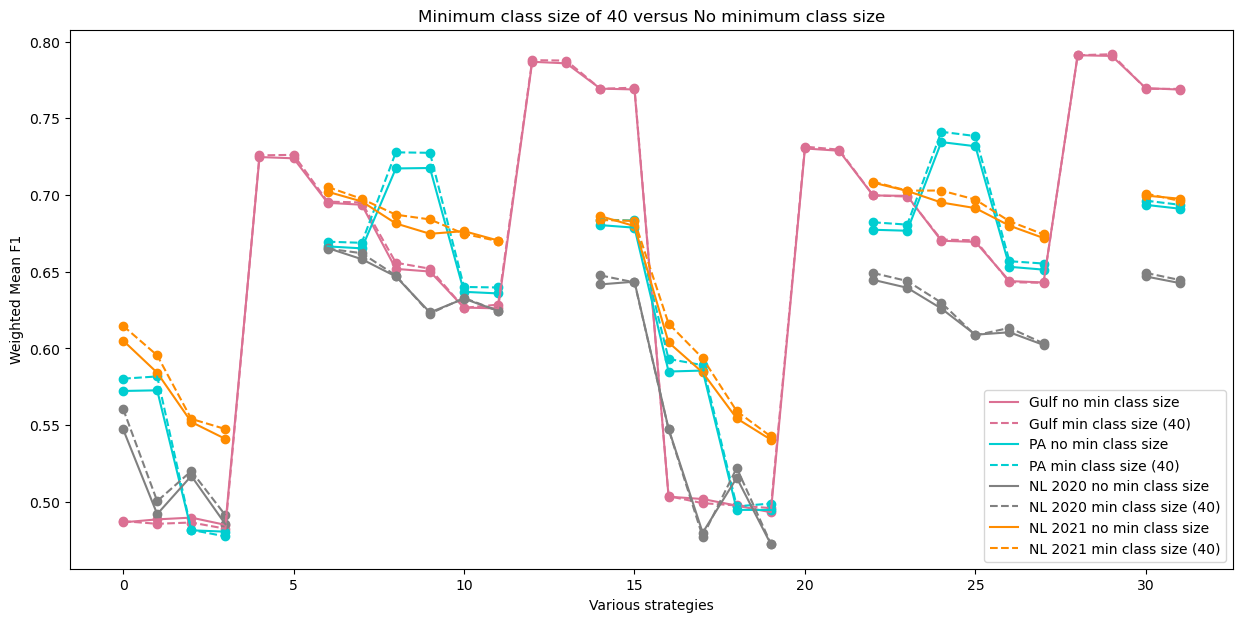

In [13]:
no_scn_colors = {'Gulf': 'palevioletred', 'PA': 'darkturquoise', 'NL 2020': 'gray', 'NL 2021': 'darkorange'}
scn_colors = {'Gulf': 'lime', 'PA': 'lightblue', 'NL 2020': 'pink', 'NL 2021': 'gold'}

fig, ax = plt.subplots(figsize=(15, 7))
for region in regions:
    no_min_class_size = big_df[(big_df['regions'] == region) & (big_df['min_class_sizes'] == 'all')]['f1 nulled'].to_numpy()
    min_class_size = big_df[(big_df['regions'] == region) & (big_df['min_class_sizes'] == 'restricted')]['f1 nulled'].to_numpy()
    

    plt.title('Minimum class size of 40 versus No minimum class size')
    # all = [all[i] for i in reorder_list]
    plt.scatter(range(len(no_min_class_size)), no_min_class_size, c=no_scn_colors[region])
    plt.scatter(range(len(min_class_size)), min_class_size, c=no_scn_colors[region])
    plt.plot(no_min_class_size, c=no_scn_colors[region], label=f'{region} no min class size')
    plt.plot(min_class_size, c=no_scn_colors[region], linestyle='dashed', label=f'{region} min class size (40)')
plt.xlabel('Various strategies')
plt.ylabel('Weighted Mean F1')
# plt.xticks(range(4), [200, 5000, 20000, 'Max'])
plt.legend(loc='lower right')
plt.show()
plt.close()

#turquoise: #00d0d6
#ruddy red: #e87474

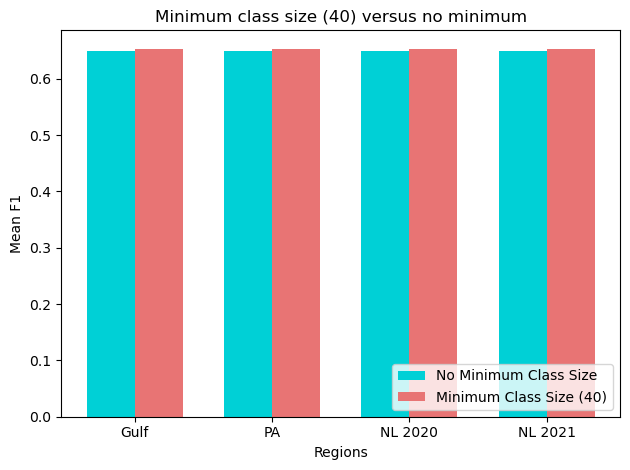

In [14]:
# Bar width and positions
bar_width = 0.35
index = np.arange(len(regions))

# Create the bar chart
fig, ax = plt.subplots()

# Plot bars for the "before" values
bars_before = ax.bar(index, np.nanmean(no_min_class_size), bar_width, label='No Minimum Class Size', color='#00d0d6')

# Plot bars for the "after" values next to the "before" bars
bars_after = ax.bar(index + bar_width, np.nanmean(min_class_size), bar_width, label='Minimum Class Size (40)', color='#e87474')

# Add labels and title
ax.set_xlabel('Regions')
ax.set_ylabel('Mean F1')
ax.set_title('Minimum class size (40) versus no minimum')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(regions)

# Add a legend
ax.legend(loc='lower right')

# Display the plot
plt.tight_layout()
plt.show()

#turquoise: #00d0d6
#ruddy red: #e87474

Gulf [0.5036641647088008, 0.6710038794625941, 0.7315553478360877, 0.7911610742021442]
PA [0.5931296965947692, 0.7412591389799705, nan, nan]
NL 2020 [0.547270722791038, 0.629871848216757, nan, nan]
NL 2021 [0.6161882219534336, 0.7029525758572286, nan, nan]


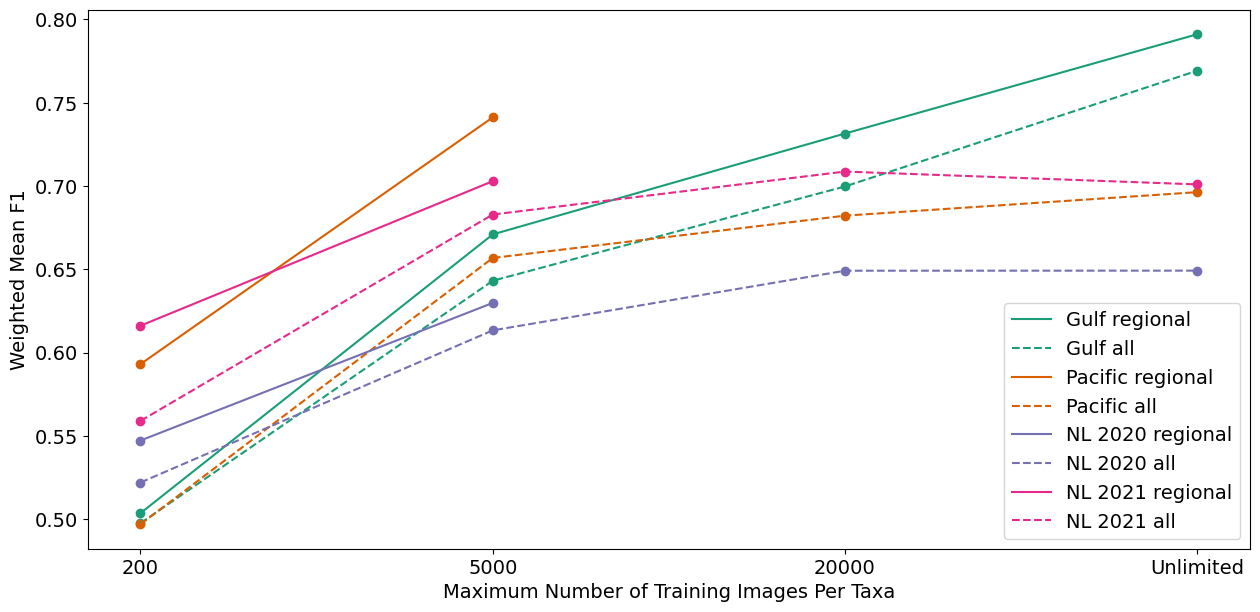

In [15]:
#This code graphs the effect of regional images and maximum class size

no_scn_colors = {'Gulf': 'palevioletred', 'PA': 'darkturquoise', 'NL 2020': 'gray', 'NL 2021': 'darkorange'}
scn_colors = {'Gulf': 'lime', 'PA': 'lightblue', 'NL 2020': 'pink', 'NL 2021': 'gold'}
regionColors = {'PA': '#d95f02', 'Gulf':'#1b9e77', 'NL 2020': '#7570b3', 'NL 2021': '#e7298a'}
region_conversion = {'Gulf': 'Gulf', 'NL 2020': 'NL 2020', 'NL 2021': 'NL 2021', 'PA': 'Pacific'}
fig, ax = plt.subplots(figsize=(15, 7))
for region in regions:
    regional = big_df[(big_df['regions'] == region) & (big_df['training regions'] == 'regional') & (big_df['scn'] == 0) & (big_df['min_class_sizes'] == 'restricted') & (big_df['extra classes included'] == 0)]['f1 nulled'].to_numpy()
    all = big_df[(big_df['regions'] == region) & (big_df['training regions'] == 'all') & (big_df['scn'] == 0) & (big_df['min_class_sizes'] == 'restricted') & (big_df['extra classes included'] == 0)]['f1 nulled'].to_numpy()

    # plt.title('Regional Training Data (Solid) vs All Training Data (Dashed)')
    reorder_list = [0, 2, 1, 3]
    regional = [regional[i] for i in reorder_list]
    all = [all[i] for i in reorder_list]
    print(region, regional)
    plt.scatter(range(4), regional, c=regionColors[region])
    plt.scatter(range(4), all, c=regionColors[region])
    plt.plot(regional, c=regionColors[region], label=f'{region_conversion[region]} regional')
    plt.plot(all, c=regionColors[region], linestyle='dashed', label=f'{region_conversion[region]} all')
plt.xlabel('Maximum Number of Training Images Per Taxa', fontsize=14)
plt.ylabel('Weighted Mean F1', fontsize=14)
plt.xticks(range(4), [200, 5000, 20000, 'Unlimited'], fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.show()
plt.close()

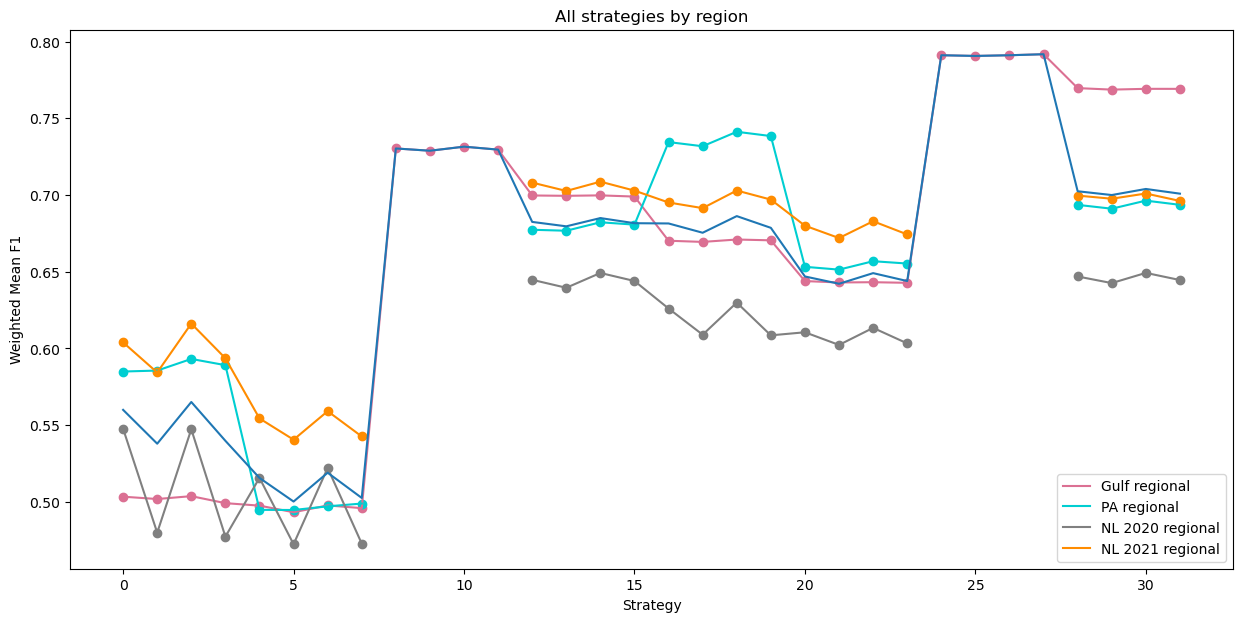

In [116]:
#ALL STRATEGIES PER REGION

no_scn_colors = {'Gulf': 'palevioletred', 'PA': 'darkturquoise', 'NL 2020': 'gray', 'NL 2021': 'darkorange'}
scn_colors = {'Gulf': 'lime', 'PA': 'lightblue', 'NL 2020': 'pink', 'NL 2021': 'gold'}
all_regions = []
fig, ax = plt.subplots(figsize=(15, 7))
for region in regions:
    regional = big_df[(big_df['regions'] == region) & (big_df['scn'] == 0)]['f1 nulled'].to_numpy()
    all_regions.append(regional)
    plt.scatter(range(len(regional)), regional, c=no_scn_colors[region])
    plt.plot(regional, c=no_scn_colors[region], label=f'{region} regional')

plt.plot(np.nanmean(np.array(all_regions), axis=0))
plt.xlabel('Strategy')
plt.title('All strategies by region')
plt.ylabel('Weighted Mean F1')
plt.legend(loc='lower right')
plt.show()
plt.close()

In [142]:
for region in regions:
    scn = big_df[(big_df['regions'] == region) & (big_df['scn'] == 1)]['f1 nulled'].to_numpy()
    no_scn = big_df[(big_df['regions'] == region) & (big_df['scn'] == 0)]['f1 nulled'].to_numpy()
    print(len(scn), len(no_scn))
    scn = scn[~np.isnan(scn)]
    no_scn = no_scn[~np.isnan(no_scn)]
    print(len(scn), len(no_scn))
    
    from scipy.stats import wilcoxon
    from scipy.stats import norm
    
    
    # Perform the Wilcoxon signed-rank test
    stat, p_value = wilcoxon(no_scn, scn)
    
    # Calculate the effect size (r)
    n = len(no_scn) + len(scn)
    z = norm.ppf(1 - p_value / 2)  # Compute z-score from p-value (two-tailed test)
    effect_size = z / np.sqrt(n)
    
    # Output the test statistic and p-value
    print(f"Wilcoxon test statistic: {stat}")
    print(f"P-value: {p_value}")
    print(f"effect size: {effect_size}")
    print("diff", np.mean(no_scn) - np.mean(scn), np.mean(no_scn), np.mean(scn))

32 32
32 32
Wilcoxon test statistic: 7.0
P-value: 8.847564458847046e-09
effect size: 0.7189325887299105
diff 0.00908660255055116 0.6626962368256983 0.6536096342751472
32 32
24 24
Wilcoxon test statistic: 0.0
P-value: 1.1920928955078125e-07
effect size: 0.7642247071675533
diff 0.013539075792457722 0.6413549797592619 0.6278159039668042
32 32
24 24
Wilcoxon test statistic: 23.0
P-value: 7.62939453125e-05
effect size: 0.5709637703242127
diff -0.012380064830707305 0.5874242244999995 0.5998042893307068
32 32
24 24
Wilcoxon test statistic: 22.0
P-value: 6.389617919921875e-05
effect size: 0.5770529137688655
diff 0.006688120975866907 0.6544626765811229 0.647774555605256


In [6]:
dfs = []
for region in regions:
    dfs[region] = pd.DataFrame.from_dict(all_f1[region])
dfs['Gulf']

,samples used,With SCN-200 Objects,With SCN-20000 Objects,With SCN-5000 Objects,With SCN-Max Objects,Without SCN-200 Objects,Without SCN-20000 Objects,Without SCN-5000 Objects,Without SCN-Max Objects
0,strategy#1_expID93495,0.486576,0.724782,0.651853,0.786899,0.503315,0.730381,0.670210,0.791168
1,strategy#2_expID93497,0.488525,0.723957,0.650126,0.785880,0.501792,0.728893,0.669448,0.790710
2,strategy#3_expID93499,0.487379,0.725878,0.655879,0.787955,0.503664,0.731555,0.671004,0.791161
3,strategy#4_expID93501,0.485634,0.726214,0.651972,0.787690,0.499095,0.729617,0.670476,0.791830
4,strategy#5_expID93503,0.489669,0.694935,0.626618,0.769385,0.497483,0.699728,0.643901,0.769732
5,strategy#6_expID93505,0.484929,0.693689,0.626087,0.768862,0.493160,0.699496,0.642998,0.768753
6,strategy#7_expID93507,0.486480,0.695695,0.626475,0.769273,0.497614,0.699791,0.643172,0.769263
7,strategy#8_expID93509,0.482449,0.695196,0.628537,0.770028,0.495852,0.699006,0.642770,0.769242
8,strategy#9_expID93511,0.406620,0.642621,0.549589,0.701077,0.417394,0.641432,0.565102,0.700371
9,strategy#10_expID93513,0.427076,0.634239,0.555314,0.691992,0.435594,0.633568,0.568484,0.688940


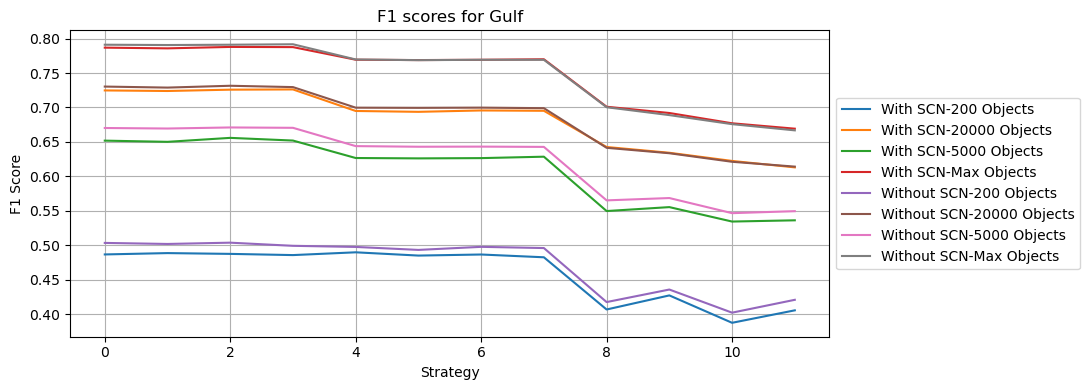

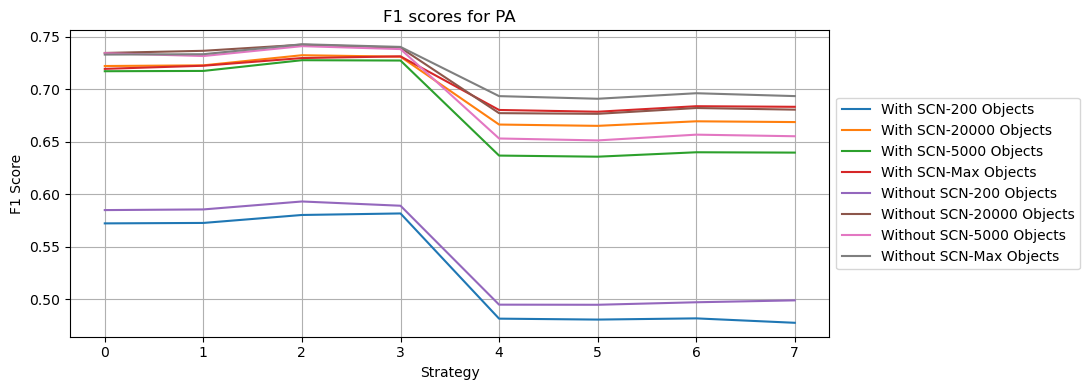

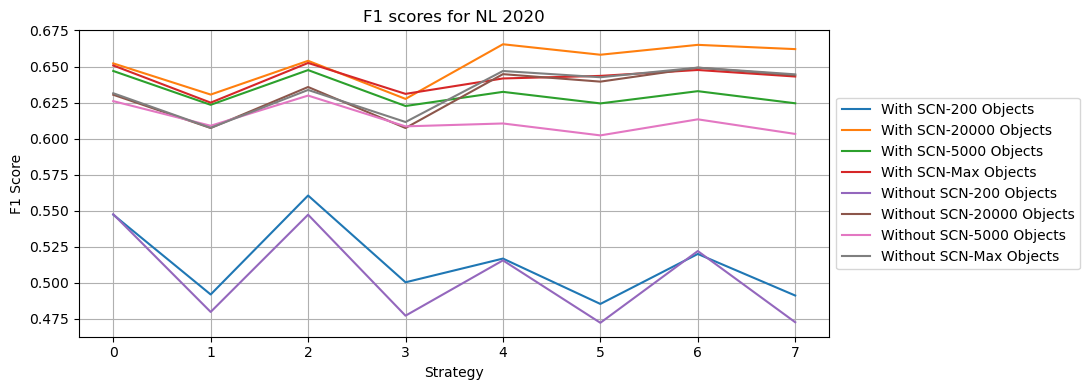

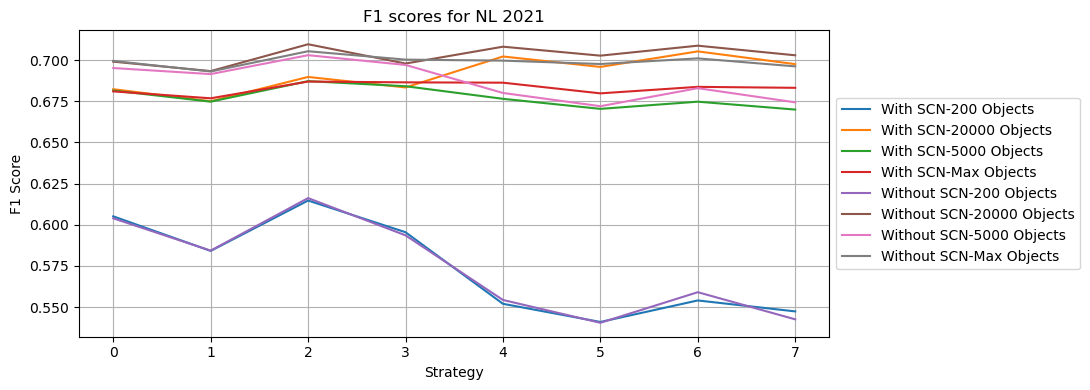

In [98]:
for region in regions:
    fig, ax = plt.subplots(figsize=(11, 4))
    dfs[region].plot(kind='line', ax=ax)
    plt.title(f'F1 scores for {region}')
    plt.ylabel('F1 Score')
    plt.xlabel('Strategy')
    plt.grid(True)
    # Move the legend outside the plot
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust the layout to make room for the legend
    plt.tight_layout()
    # plt.ylim([0, 1])
    # plt.xticks(range(len(dfs[region])), list(dfs[region]['samples used']), rotation=45)
    plt.show()
    plt.close()

# for region in regions:
    
#     # Set 'Year' as the index for the x-axis
#     dfs[region].set_index('Strategy', inplace=True)
    
#     # Plot the DataFrame
#     ax = df.plot(kind='line')
    
#     # Customize the plot
#     plt.title('Sales Comparison Over Years')
#     plt.ylabel('Sales')
#     plt.xlabel('Year')
#     plt.grid(True)
    
#     # Move the legend outside the plot
#     ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
#     # Adjust the layout to make room for the legend
#     plt.tight_layout()
    
#     # Show the plot
#     plt.show()

In [119]:
sample_means = {}
for region in regions:
    sample_means[region] = []
    for col in dfs[region].columns.values[1:]:
        sample_means[region].append(np.mean(dfs[region][col]))

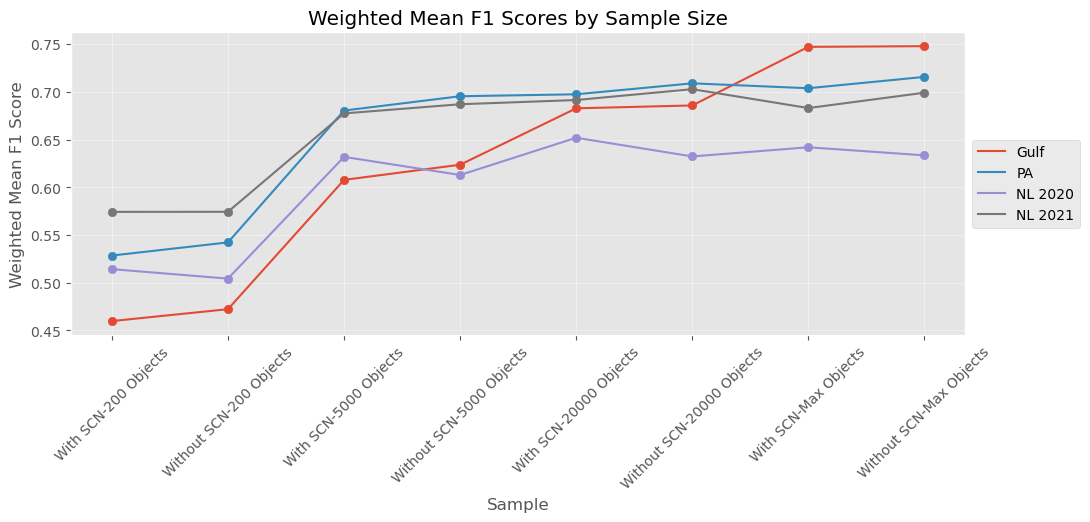

In [137]:

reorder = [0, 4, 2, 6, 1, 5, 3, 7]


plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(11, 4))
for region in regions:
    region_sample_means = sample_means[region]
    region_sample_means = [region_sample_means[i] for i in reorder]
    plt.plot(region_sample_means, label=region)
for region in regions:
    region_sample_means = sample_means[region]
    region_sample_means = [region_sample_means[i] for i in reorder]
    plt.scatter(range(len(region_sample_means)), region_sample_means)
plt.title(f'Weighted Mean F1 Scores by Sample Size')
plt.ylabel('Weighted Mean F1 Score')
plt.xlabel('Sample')
plt.grid(True, alpha=0.4)
# Move the legend outside the plot
plt.legend(regions, loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust the layout to make room for the legend
plt.tight_layout()
# plt.ylim([0, 1])
sample_names = list(dfs['Gulf'].columns.values[1:])
tick_x = [sample_names[i] for i in reorder]
plt.xticks(range(8), tick_x, rotation=45)
plt.show()
plt.close()

0     0.668148
1     0.667417
2     0.669309
3     0.667816
4     0.648931
5     0.647247
6     0.648470
7     0.647885
8     0.578026
9     0.579401
10    0.558319
11    0.559345
dtype: float64


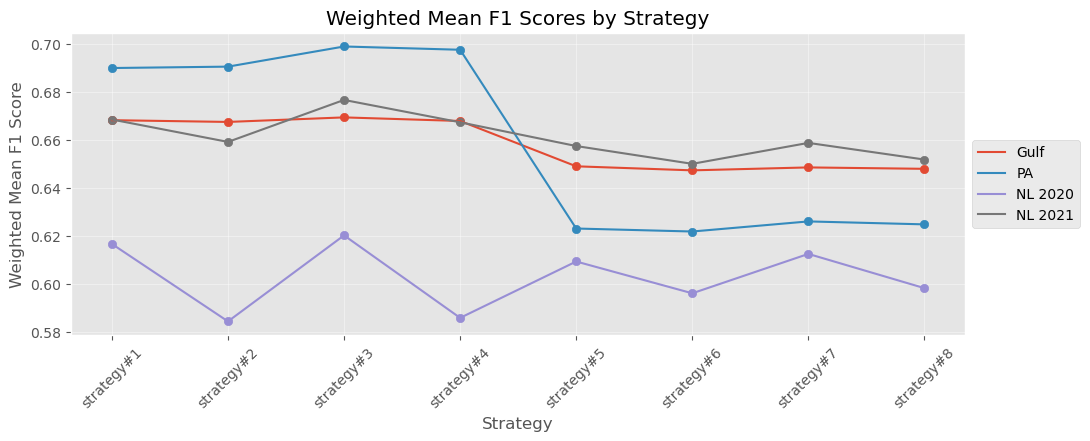

In [138]:
mean_by_strat = dfs['Gulf'][list(dfs['Gulf'].columns.values)[1:]].mean(axis=1)
print(mean_by_strat)
dfs['Gulf']

fig, ax = plt.subplots(figsize=(11, 4))
for region in regions:
    mean_by_strat = dfs[region][list(dfs[region].columns.values)[1:]].mean(axis=1)
    plt.plot(mean_by_strat[:8], label=region)
for region in regions:
    mean_by_strat = dfs[region][list(dfs[region].columns.values)[1:]].mean(axis=1)
    plt.scatter(range(len(mean_by_strat[:8])), mean_by_strat[:8])
plt.title(f'Weighted Mean F1 Scores by Strategy')
plt.ylabel('Weighted Mean F1 Score')
plt.xlabel('Strategy')
plt.grid(True, alpha=0.4)
# Move the legend outside the plot
plt.legend(regions, loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust the layout to make room for the legend
plt.tight_layout()
# plt.ylim([0, 1])
sample_names = dfs['Gulf']['samples used'][:8]
sample_names = [sample_name.split('_')[0] for sample_name in sample_names]
plt.xticks(range(8), sample_names, rotation=45)
plt.show()
plt.close()



In [33]:
scn = {}
for region in regions:
    scn[region] = {}
    for key in all_f1[region].keys():
        if 'With SCN' in key:
            scn[region][key] = all_f1[region][key]
no_scn = {}
for region in regions:
    no_scn[region] = {}
    for key in all_f1[region].keys():
        if 'Without SCN' in key:
            no_scn[region][key] = all_f1[region][key]


scn_f1s = {}
for region in regions:
    scn_f1s[region] = []
    for f1_list in scn[region].values():
        for f1 in f1_list:
            scn_f1s[region].append(f1)

no_scn_f1s = {}
for region in regions:
    no_scn_f1s[region] = []
    for f1_list in no_scn[region].values():
        for f1 in f1_list:
            no_scn_f1s[region].append(f1)

print(len(no_scn_f1s), len(scn_f1s))

4 4


In [36]:
from scipy.stats import wilcoxon
from scipy.stats import norm

scn_one_list = []
no_scn_one_list = []
for region in regions:
    scn_one_list += scn_f1s[region]
    no_scn_one_list += no_scn_f1s[region]
# Perform the Wilcoxon signed-rank test
stat, p_value = wilcoxon(no_scn_one_list, scn_one_list)

# Calculate the effect size (r)
n = len(no_scn_one_list) + len(scn_one_list)
z = norm.ppf(1 - p_value / 2)  # Compute z-score from p-value (two-tailed test)
effect_size = z / np.sqrt(n)

# Output the test statistic and p-value
print(f"Wilcoxon test statistic: {stat}")
print(f"P-value: {p_value}")
print(f"effect size: {effect_size}")
print("diff", np.mean(no_scn_one_list) - np.mean(scn_one_list), np.mean(no_scn_one_list), np.mean(scn_one_list))

Wilcoxon test statistic: 3236.0
P-value: 7.599227581275541e-05
effect size: 0.2331507818987899
diff 0.004465002279967156 0.6390216206576412 0.6345566183776741


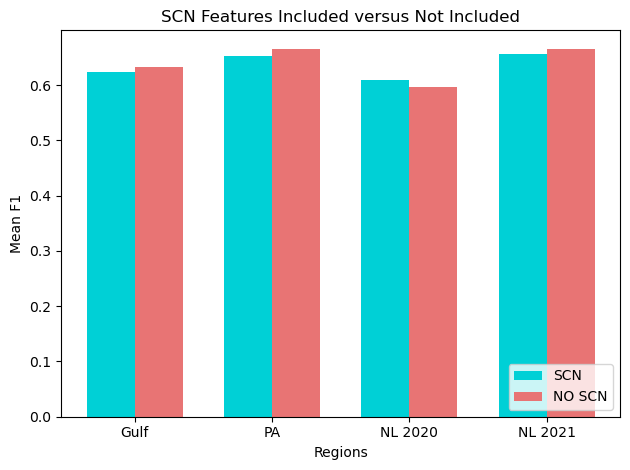

In [129]:
scn_regional_means = []
for f1s in scn_f1s.values():
    scn_regional_means.append(np.mean(f1s))

no_scn_regional_means = []
for f1s in no_scn_f1s.values():
    no_scn_regional_means.append(np.mean(f1s))

# Bar width and positions
bar_width = 0.35
index = np.arange(len(regions))

# Create the bar chart
fig, ax = plt.subplots()

# Plot bars for the "before" values
bars_before = ax.bar(index, scn_regional_means, bar_width, label='SCN', color='#00d0d6')

# Plot bars for the "after" values next to the "before" bars
bars_after = ax.bar(index + bar_width, no_scn_regional_means, bar_width, label='NO SCN', color='#e87474')

# Add labels and title
ax.set_xlabel('Regions')
ax.set_ylabel('Mean F1')
ax.set_title('SCN Features Included versus Not Included')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(regions)

# Add a legend
ax.legend(loc='lower right')

# Display the plot
plt.tight_layout()
plt.show()

#turquoise: #00d0d6
#ruddy red: #e87474